In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

In [56]:
df = pd.read_csv('/content/house_prices (1).csv')


In [57]:
df.head()

,House Size (sqft),Bedrooms,Location,Price
0,3974,3,Countryside,256730
1,1660,5,Countryside,970910
2,2094,2,Downtown,484681
3,1930,4,Suburb,249503
4,1895,2,Countryside,754811


In [58]:
print(df.shape)

(15, 4)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   House Size (sqft)  15 non-null     int64 
 1   Bedrooms           15 non-null     int64 
 2   Location           15 non-null     object
 3   Price              15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes


In [ ]:
df.isna().sum()

,0
House Size (sqft),0
Bedrooms,0
Location,0
Price,0


In [60]:


df.describe()



,House Size (sqft),Bedrooms,Price
count,15.000000,15.000000,15.000000
mean,2546.200000,3.066667,494671.866667
std,976.990291,1.486447,245766.889568
min,1130.000000,1.000000,165725.000000
25%,1912.500000,2.000000,253116.500000
50%,2282.000000,3.000000,484681.000000
75%,3344.000000,4.000000,673781.000000
max,3974.000000,5.000000,970910.000000


In [ ]:
# Remove rows where price is beyond 2 standard deviations
mean_price = df["Price"].mean()
std_price = df["Price"].std()
df = df[(df["Price"] > mean_price - 2*std_price) & (df["Price"] < mean_price + 2*std_price)]

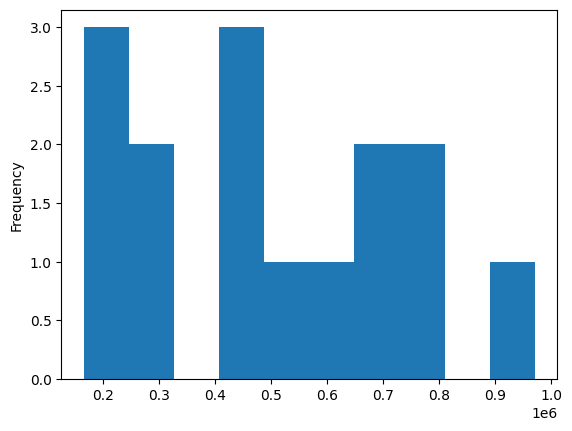

In [61]:


for column in df.columns[3:40]:
  df[column].plot(kind='hist')
  plt.show()



In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
print("\nUnique Locations:")
print(df["Location"].unique())



Unique Locations:
['Countryside' 'Downtown' 'Suburb']


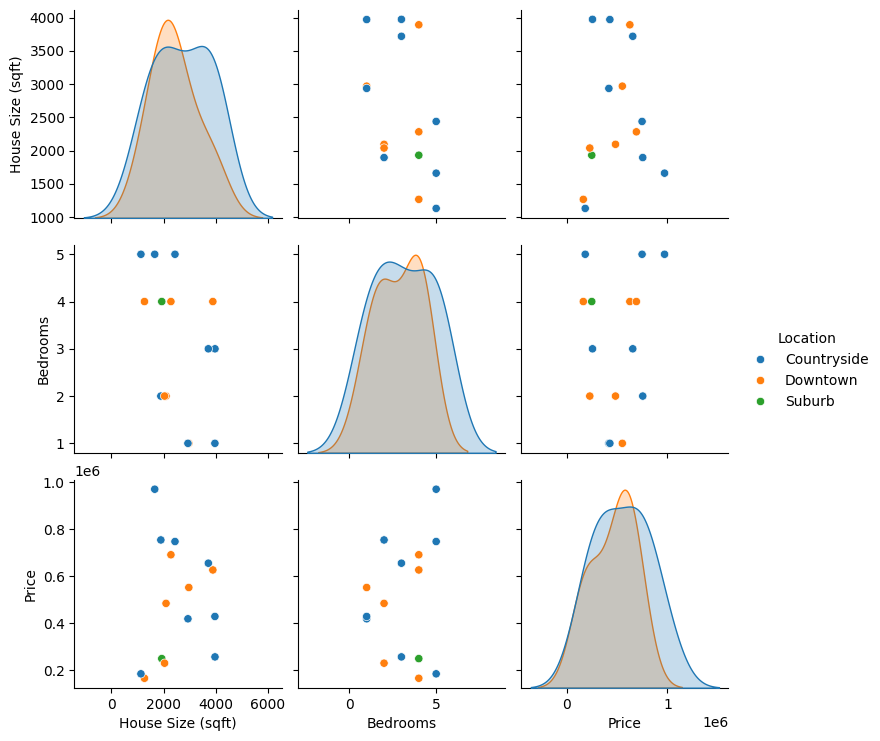

In [64]:
sns.pairplot(df, hue="Location")
plt.show()

<ipython-input-65-373b07af1537>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Location", y="Price", palette="pastel")


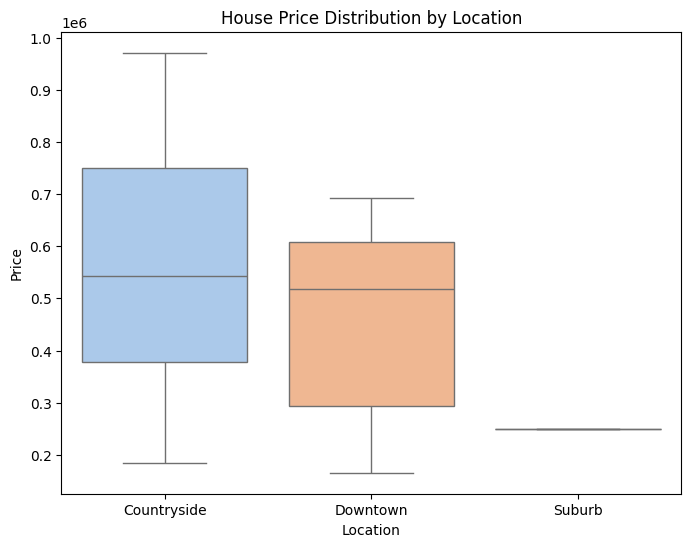

In [65]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Location", y="Price", palette="pastel")
plt.title("House Price Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()


In [66]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [67]:
label_encoder = LabelEncoder()
df["Location"] = label_encoder.fit_transform(df["Location"])

In [68]:
scaler = StandardScaler()
df[["House Size (sqft)", "Price"]] = scaler.fit_transform(df[["House Size (sqft)", "Price"]])

In [69]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)


In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [70]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)  # Accuracy in percentage

In [73]:
print("Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Model Accuracy: {accuracy:.2f}%")

Model Performance:
Mean Absolute Error: 117659.73513042268
Mean Squared Error: 22008283295.87459
R-squared Score: 0.5086706760242894
Model Accuracy: 0.51%


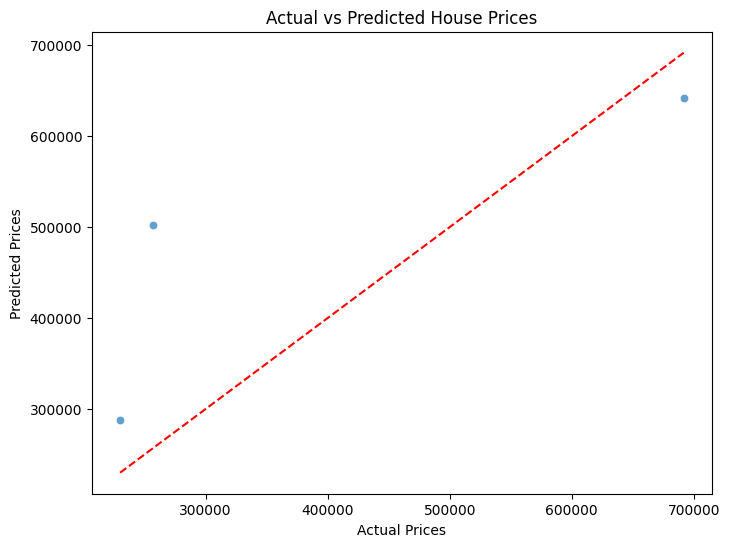

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

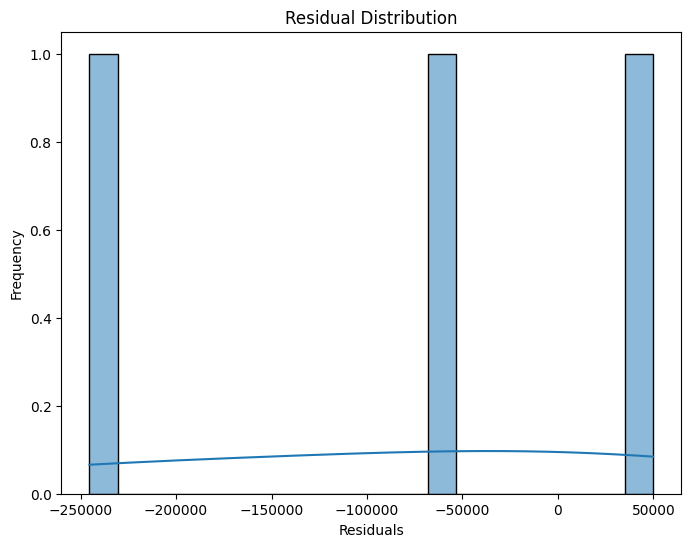

In [75]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
# prompt: apply random forest

from sklearn.model_selection import train_test_split

# ... (Your existing code)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test,y_test)
print("Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Model Accuracy: {accuracy:.2f}%")

# ... (rest of your code for visualization)


Model Performance:
Mean Absolute Error: 130817.31333333331
Mean Squared Error: 22937424283.841198
R-squared Score: 0.48792783991306354
Model Accuracy: 0.49%


In [78]:
import joblib

# Save the trained model
joblib.dump(model, "house_price_model.pkl")


['house_price_model.pkl']

In [79]:
from google.colab import files
files.download("house_price_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: deploy it using flask which take input as house size bedroom and location and give price

from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

app = Flask(__name__)

# Load the trained model
model = joblib.load("house_price_model.pkl")

# Load the label encoder (assuming you saved it as 'label_encoder.pkl')
label_encoder = joblib.load("label_encoder.pkl") # You'll need to save label_encoder

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        house_size = data['house_size']
        bedrooms = data['bedrooms'] # Assuming you have bedrooms in your model
        location = data['location']

        # Create a DataFrame for prediction
        input_data = pd.DataFrame([[house_size, bedrooms, location]], columns=['House Size (sqft)', 'Bedrooms', 'Location'])

        # Encode the location using the loaded label encoder
        input_data['Location'] = label_encoder.transform(input_data['Location'])

        # Scale numerical features (use the same scaler used during training)
        scaler = StandardScaler()  #You need to save and load the scaler as well
        input_data[['House Size (sqft)']] = scaler.fit_transform(input_data[['House Size (sqft)']])

        # One-hot encode location (handle potential unseen locations)
        input_data = pd.get_dummies(input_data, columns=['Location'], drop_first=True)

        # Align columns with training data (handle missing columns)
        missing_cols = set(X_train.columns) - set(input_data.columns)
        for c in missing_cols:
          input_data[c] = 0
        input_data = input_data[X_train.columns]

        prediction = model.predict(input_data)

        # Inverse transform the prediction (if you scaled the target variable)
        # prediction = scaler.inverse_transform(prediction.reshape(-1, 1))  # If scaled during training

        return jsonify({'price': prediction[0]})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)
